In [1]:
import tarfile
import os
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import umap.umap_ as umap
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report, f1_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.manifold import TSNE
from prettytable import PrettyTable


from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
import plotly.express as px

Cargamos el dataset

In [2]:
df = pd.read_csv('Final_DF.csv')
df_Val = df.sample(n=100, random_state=42)
df_DR = df.drop(df_Val.index)

Analisis exploratorio

In [36]:
df.info()
df_DR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Columns: 5507 entries, label to 5505
dtypes: float64(5506), int64(1)
memory usage: 38.5 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 915
Columns: 5507 entries, label to 5505
dtypes: float64(5506), int64(1)
memory usage: 34.3 MB


In [36]:
df.head()

,label,0,1,2,3,4,5,6,7,8,...,5496,5497,5498,5499,5500,5501,5502,5503,5504,5505
0,0,-0.964529,-0.332792,-0.379235,0.150207,-0.359621,-0.340448,0.357554,0.206996,2.511573,...,-0.321652,-0.318491,1.519146,1.577873,0.534328,-0.533841,0.803352,0.870346,-0.102527,-0.626965
1,1,0.280204,-0.471443,0.396663,-0.422984,0.111519,0.147885,-0.448013,0.569856,-0.897887,...,0.393075,-0.511588,-0.261696,0.956910,-0.817566,0.818386,-1.008814,-0.218998,-0.750503,-0.164262
2,0,0.911866,-0.004333,-0.057318,-1.009914,0.919007,-0.026294,0.047738,-0.923957,-0.949787,...,-0.228523,-0.802694,-0.474846,0.583324,-0.579895,0.580235,-0.920529,0.289299,0.499498,1.079332
3,0,0.072426,0.096248,0.041259,-0.032970,-0.984067,0.069906,-0.943670,0.980807,-0.949787,...,-0.863400,-0.137135,-0.101759,-0.348370,1.509413,-1.509074,-0.324484,-0.600583,1.308150,-0.256854
4,1,-0.753162,-0.471443,-0.372134,-0.422984,-0.544684,-0.758466,-0.448013,-0.598581,0.400047,...,-0.450720,-0.511588,-0.788192,0.119117,-1.367701,1.367574,0.171476,1.616146,-1.250966,-0.301725


In [37]:
df_DR.head()

,label,0,1,2,3,4,5,6,7,8,...,5496,5497,5498,5499,5500,5501,5502,5503,5504,5505
0,0,-0.964529,-0.332792,-0.379235,0.150207,-0.359621,-0.340448,0.357554,0.206996,2.511573,...,-0.321652,-0.318491,1.519146,1.577873,0.534328,-0.533841,0.803352,0.870346,-0.102527,-0.626965
1,1,0.280204,-0.471443,0.396663,-0.422984,0.111519,0.147885,-0.448013,0.569856,-0.897887,...,0.393075,-0.511588,-0.261696,0.956910,-0.817566,0.818386,-1.008814,-0.218998,-0.750503,-0.164262
2,0,0.911866,-0.004333,-0.057318,-1.009914,0.919007,-0.026294,0.047738,-0.923957,-0.949787,...,-0.228523,-0.802694,-0.474846,0.583324,-0.579895,0.580235,-0.920529,0.289299,0.499498,1.079332
3,0,0.072426,0.096248,0.041259,-0.032970,-0.984067,0.069906,-0.943670,0.980807,-0.949787,...,-0.863400,-0.137135,-0.101759,-0.348370,1.509413,-1.509074,-0.324484,-0.600583,1.308150,-0.256854
4,1,-0.753162,-0.471443,-0.372134,-0.422984,-0.544684,-0.758466,-0.448013,-0.598581,0.400047,...,-0.450720,-0.511588,-0.788192,0.119117,-1.367701,1.367574,0.171476,1.616146,-1.250966,-0.301725


In [38]:
df_Val.head()

,label,0,1,2,3,4,5,6,7,8,...,5496,5497,5498,5499,5500,5501,5502,5503,5504,5505
380,0,-0.367495,-0.351794,-0.993804,-0.447431,-0.378543,0.804524,0.949019,-0.375616,0.728448,...,1.612756,-0.802694,1.037844,1.108469,-1.131299,1.131747,-0.342688,-0.238969,-0.580325,0.285034
879,0,2.617680,0.864321,-0.993804,2.364985,-0.984067,0.804524,2.841708,-0.923957,-0.949787,...,-0.863400,-0.802694,-0.767567,-1.118330,0.965596,-0.966171,0.742165,0.059177,0.124099,-0.537232
355,0,4.408784,0.864321,-0.993804,0.677535,0.832504,-0.940195,0.949019,-0.923957,0.728448,...,-0.863400,-0.802694,-1.662463,-0.564506,-0.009772,0.009537,-0.985394,1.047574,0.852021,1.069534
357,0,0.020578,-0.959852,1.956127,-0.081817,1.014161,0.019401,1.138288,-0.019194,-0.949787,...,2.003511,-0.802694,0.548157,0.994580,-0.824492,0.824507,1.208055,1.824881,-0.874300,-0.269117
362,1,-0.753162,-0.471443,-0.372134,-0.422984,3.695401,-0.758466,-0.448013,-0.598581,0.899252,...,7.467937,-0.511588,1.424628,-1.918681,2.849807,-2.851584,2.993729,-1.480752,-0.248692,-1.854898


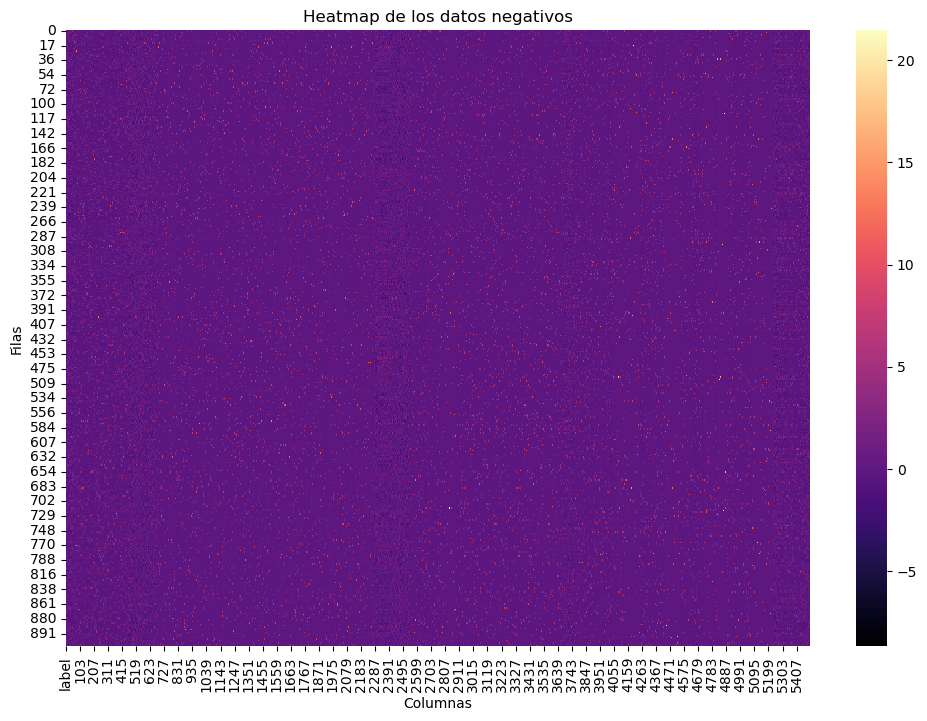

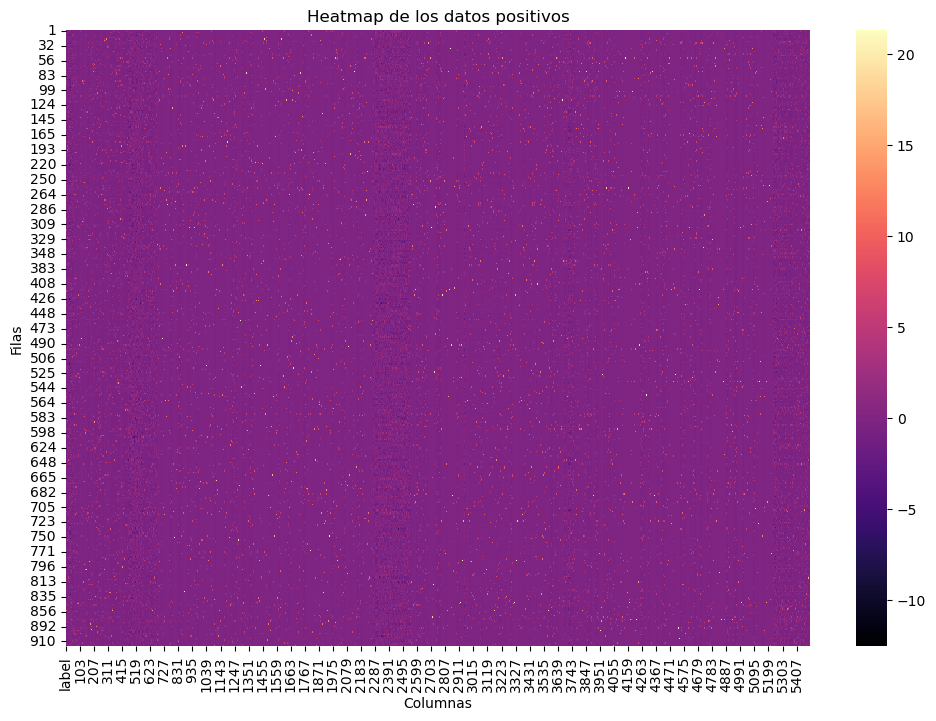

In [37]:
df_negativos = df[df['label'] == 0]
#print(df_negativos)
df_positivos = df[df['label'] == 1]


# Crear el heatmap
plt.figure(figsize=(12, 8))  # Ajustar el tamaño según sea necesario
heatmap = sns.heatmap(df_negativos, cmap='magma', cbar=True, annot=False)

# Añadir etiquetas y título
plt.title('Heatmap de los datos negativos')
plt.xlabel('Columnas')
plt.ylabel('Filas')

# Mostrar el heatmap
plt.show()


# Crear el heatmap
plt.figure(figsize=(12, 8))  # Ajustar el tamaño según sea necesario
heatmap = sns.heatmap(df_positivos, cmap='magma', cbar=True, annot=False)

# Añadir etiquetas y título
plt.title('Heatmap de los datos positivos')
plt.xlabel('Columnas')
plt.ylabel('Filas')

# Mostrar el heatmap
plt.show()

No parece haber una tendencia en los datos mas alla de que la mayoria de valores cae e este rango

# Clustering 

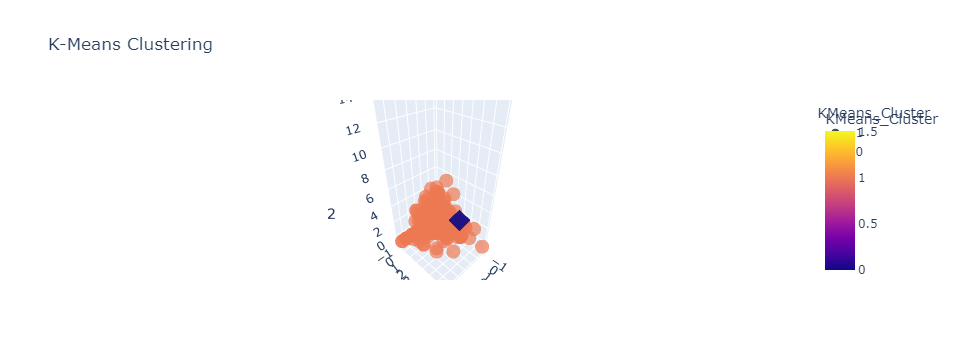

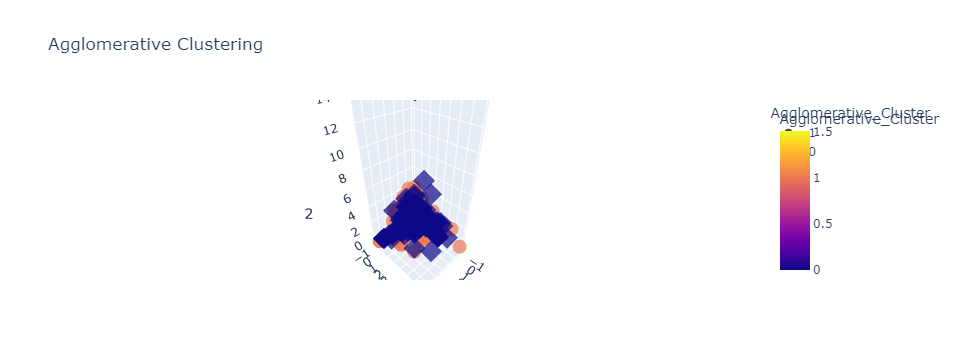

In [10]:
df_c = df_DR.drop("label", axis=1)

# Guardar las columnas originales para futuras comparaciones
columnas_originales = df_c.columns.tolist()

# Escalar los datos
scaler = StandardScaler()
C = scaler.fit_transform(df_c)

# Definir el número de clusters
num_clusters = 2

# K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_c['KMeans_Cluster'] = kmeans.fit_predict(datos_escalados)

# Agglomerative Hierarchical Clustering
agglomerative = AgglomerativeClustering(n_clusters=num_clusters)
df_c['Agglomerative_Cluster'] = agglomerative.fit_predict(datos_escalados)

# Gráfico 3D para K-Means
fig_kmeans = px.scatter_3d(df_c, x=columnas_originales[0], y=columnas_originales[1], z=columnas_originales[2],
                           color='KMeans_Cluster', symbol='KMeans_Cluster', size_max=5,
                           opacity=0.7, title='K-Means Clustering')
fig_kmeans.show()

# Gráfico 3D para Agglomerative Hierarchical Clustering
fig_agglomerative = px.scatter_3d(df_c, x=columnas_originales[0], y=columnas_originales[1], z=columnas_originales[2],
                                  color='Agglomerative_Cluster', symbol='Agglomerative_Cluster', size_max=5,
                                  opacity=0.7, title='Agglomerative Clustering')
fig_agglomerative.show()

Aparentemente K-means logro una clusterirzación, sin embargo no es un resultado aceptable que se haya quedado con solo 1 dato de una clase. Agglomerative clustering si mantuvo mas muestras pero no fue capaz de generar clusters. 

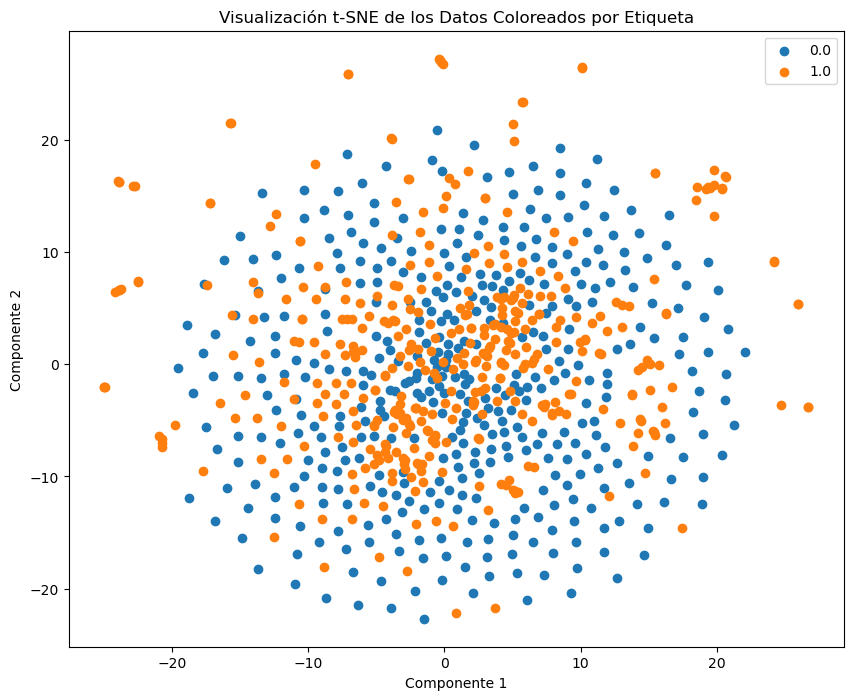

In [20]:
from sklearn.manifold import TSNE

# Separar las características y las etiquetas
X = df_DR.drop('label', axis=1)  # Features
y = df_DR['label']  # Etiquetas

# Crear un objeto t-SNE
tsne = TSNE(n_components=2, random_state=42)

# Aplicar t-SNE a tus datos
X_tsne = tsne.fit_transform(X)

# Crear un nuevo DataFrame con las coordenadas t-SNE y las etiquetas
df_tsne = pd.DataFrame(data=np.column_stack((X_tsne, y)), columns=['Componente 1', 'Componente 2', 'Etiqueta'])

# Visualizar los resultados con colores por etiqueta
plt.figure(figsize=(10, 8))

# Iterar sobre etiquetas únicas y trazar puntos con colores diferentes para cada etiqueta
for label in df_tsne['Etiqueta'].unique():
    subset = df_tsne[df_tsne['Etiqueta'] == label]
    plt.scatter(subset['Componente 1'], subset['Componente 2'], label=label)

plt.title('Visualización t-SNE de los Datos Coloreados por Etiqueta')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend()
plt.show()

Podemos observar que los datos no estan bien diferenciados entre las muestras positivas y negativas por lo que podria parecer desafiante que un modelo logre clasificarlas. 

 # Modelos

Primeramente los modelos se entrenaron con los datos en crudo para probar la eficiencia de los algoritmos. RBF SVM mostro resultados 0 en sensibilidad y f1-score, por lo tanto fue desechado.

In [28]:

# Separar el dataset
X = df_DR.drop('label', axis=1)  # Features
y = df_DR['label']  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

modelos = [
    ("Gaussian Process", GaussianProcessClassifier(1.0 * RBF(1.0))),
    ("Decision Tree", DecisionTreeClassifier(max_depth=2)),
    ("Random Forest", RandomForestClassifier(max_depth=2, n_estimators=10, max_features='sqrt', criterion='entropy')),
    ("AdaBoost", AdaBoostClassifier(n_estimators= 10 , learning_rate=0.1, base_estimator=DecisionTreeClassifier(max_depth=3) )),
    ("Naive Bayes", GaussianNB()),
    ("QDA", QuadraticDiscriminantAnalysis())
]

# Crear DataFrames vacíos para almacenar las métricas y matrices de confusión
metricas_df = pd.DataFrame(columns=['Modelo', 'Exactitud', 'Sensibilidad', 'Especificidad', 'F1 Score'])
matrices_confusion_df = pd.DataFrame(columns=['Modelo', 'Verdaderos Positivos', 'Verdaderos Negativos', 'Falsos Positivos', 'Falsos Negativos'])

# Realizar la validación cruzada con k-folds (k=10 en este ejemplo)
k_folds = 10
skf = StratifiedKFold(n_splits=k_folds)

for nombre, modelo in modelos:
    # Realizar validación cruzada
    scores = cross_val_score(modelo, X, y, cv=skf, scoring='accuracy')
    
    sensibilidades = []
    especificidades = []
    f1_scores = []
    matrices_confusion = []
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Entrenar el modelo
        modelo.fit(X_train, y_train)
        
        # Realizar predicciones
        y_pred = modelo.predict(X_test)
        
        # Calcular la matriz de confusión
        conf_matrix = confusion_matrix(y_test, y_pred)
        matrices_confusion.append(conf_matrix.flatten())

        # Calcular sensibilidad y especificidad
        sensibilidad = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
        especificidad = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
        
        sensibilidades.append(sensibilidad)
        especificidades.append(especificidad)

        # Calcular F1-score
        f1 = f1_score(y_test, y_pred)
        f1_scores.append(f1)

    # Agregar métricas al DataFrame de métricas
    metricas_df = metricas_df.append({
        'Modelo': nombre,
        'Exactitud': scores.mean() * 100,
        'Sensibilidad': sum(sensibilidades) / len(sensibilidades) * 100,
        'Especificidad': sum(especificidades) / len(especificidades) * 100,
        'F1 Score': sum(f1_scores) / len(f1_scores) * 100
    }, ignore_index=True)

    # Agregar matrices de confusión al DataFrame de matrices de confusión
    for idx, matrix in enumerate(matrices_confusion):
        matrices_confusion_df = matrices_confusion_df.append({
            'Modelo': nombre,
            'Verdaderos Positivos': matrix[3],
            'Verdaderos Negativos': matrix[0],
            'Falsos Positivos': matrix[1],
            'Falsos Negativos': matrix[2]
        }, ignore_index=True)

# Imprimir la tabla de métricas
print("Métricas:")
print(metricas_df)

Métricas:
             Modelo   Exactitud  Sensibilidad  Especificidad    F1 Score
0  Gaussian Process   52.940379      5.164634     100.000000    9.607720
1     Decision Tree   99.387233     99.756098      99.030197   99.385691
2     Random Forest  100.000000    100.000000     100.000000  100.000000
3          AdaBoost   99.018368     99.506098      98.054588   98.779943
4       Naive Bayes   85.052695     72.847561      97.073171   82.605412
5               QDA   52.705510     55.323171      50.104530   53.527832


Aparentemente los modelos random forest, decision tree y adaboost lograron unas metricas casi perfectas, sin embargo esto podria deberse a un sobreajuste. Para descartar esto se utilizo el parametro max_features='sqrt' lo que debio aportar a la eliminación del sobreajuste y también se probo que se basara en una medida entropica.

Dado que random forest sigue ajustando metricas muy perfectas, podria deberse a un sobreprocesamiento de los datos. A continuación se realiza un analísis de cada k-fold para observar como se desarrollan los modelos. 

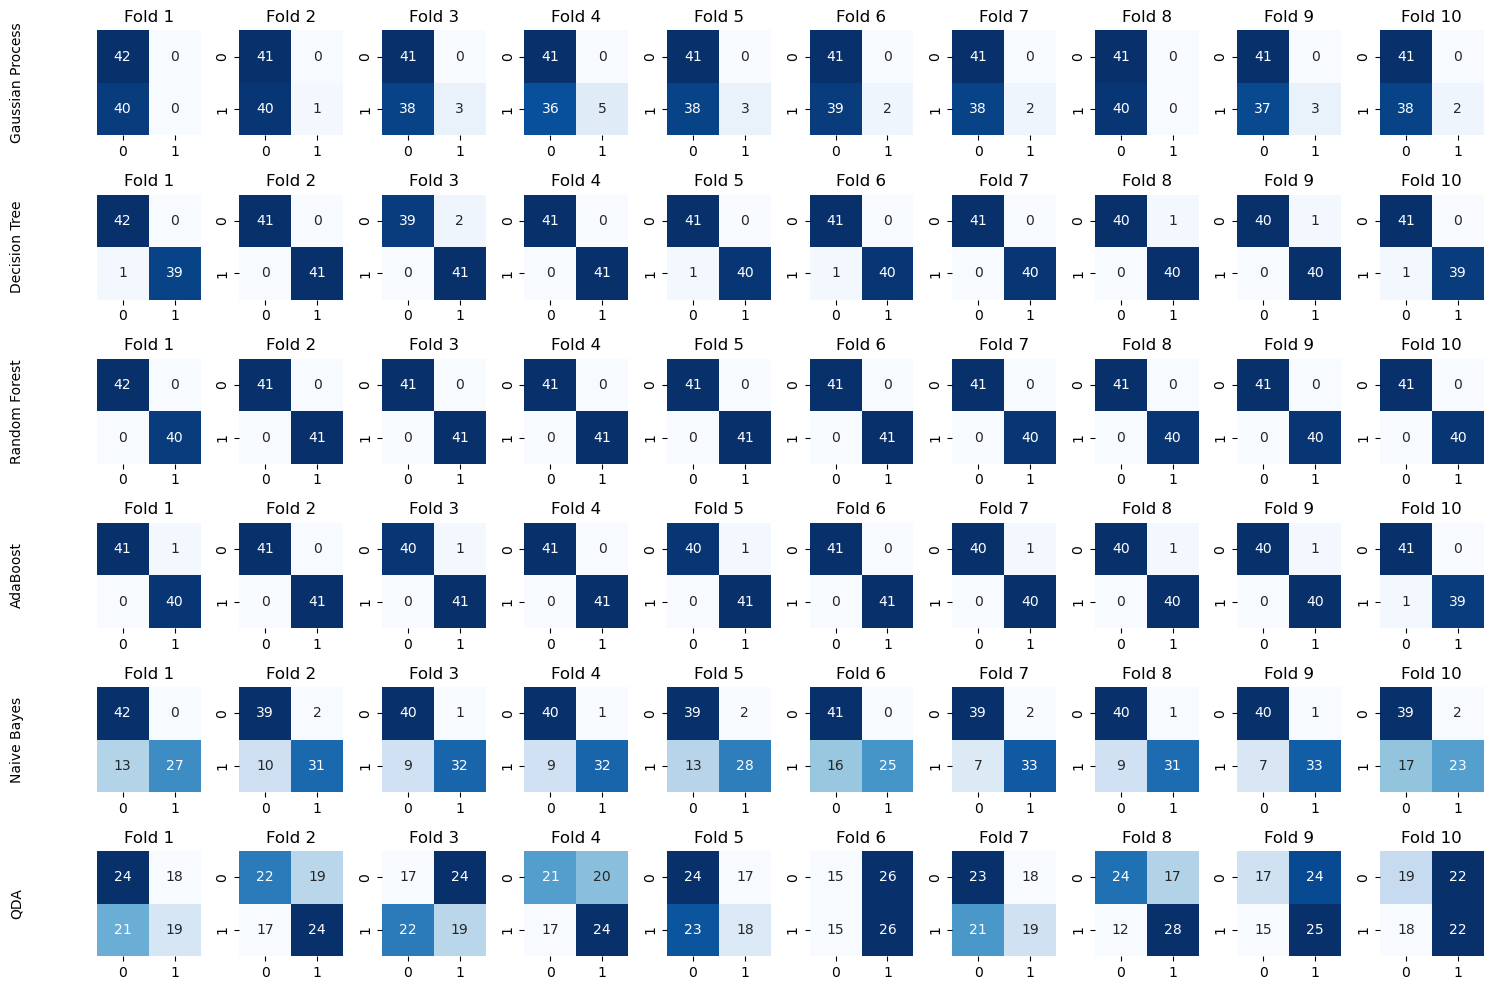

In [29]:

def plot_confusion_matrix_grid(modelos, X, y, k_folds=10):
    # Diccionario para almacenar las matrices de confusión por modelo
    matrices_confusion_dict = {}

    for nombre, modelo in modelos:
        # Realizar validación cruzada
        matrices_confusion = []

        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Entrenar el modelo
            modelo.fit(X_train, y_train)

            # Realizar predicciones
            y_pred = modelo.predict(X_test)

            # Calcular la matriz de confusión
            conf_matrix = confusion_matrix(y_test, y_pred)
            matrices_confusion.append(conf_matrix)

        # Almacenar matrices de confusión en el diccionario
        matrices_confusion_dict[nombre] = matrices_confusion

    # Generar un grid de subgráficos para las matrices de confusión
    fig, axes = plt.subplots(nrows=len(modelos), ncols=k_folds, figsize=(15, 10))

    for i, (nombre, _) in enumerate(modelos):
        for j in range(k_folds):
            # Obtener la matriz de confusión actual
            conf_matrix = matrices_confusion_dict[nombre][j]

            # Crear un mapa de calor para la matriz de confusión
            sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[i, j])
            axes[i, j].set_title(f'Fold {j + 1}')

        # Configuraciones adicionales 
        axes[i, 0].set_ylabel(nombre)
        axes[i, 0].yaxis.set_label_coords(-0.7, 0.5)
        axes[i, 0].set_yticks([])
        axes[i, 0].tick_params(axis='y', which='both', length=0)
        axes[i, 0].set_yticklabels([])

    plt.tight_layout()
    plt.show()

# Uso de la función
plot_confusion_matrix_grid(modelos, X, y)

Aparentemente random forest, adaboost, desicion tree y naive bayes tienen un desempeño muy bueno, sin embargo, habran de validarse de otra forma. Para esto se realizara una validación con 100 muestras y se observara su desempeño en la predicción de dichas muestras. 

# Modelos con validacion con datos aparte

En el siguiende codigo se realiza el mismo procedimiento de los modelos anteriores con la diferencia que aqui los modelos entrenados se almacenan para realizar la validacion posterior.

In [30]:
import joblib
# Crear un diccionario para almacenar los modelos entrenados
modelos_entrenados = {}

# Definir la variable con los datos con los que deseas entrenar
datos_entrenamiento = df_DR  # Reemplaza df_DR con tus datos

# Separar el dataset
y = datos_entrenamiento['label']
X_train, X_test, y_train, y_test = train_test_split(datos_entrenamiento, y, test_size=0.2, random_state=42)

modelos = [
    ("Gaussian Process", GaussianProcessClassifier(1.0 * RBF(1.0))),
    ("Decision Tree", DecisionTreeClassifier(max_depth=2)),
    ("Random Forest", RandomForestClassifier(max_depth=2, n_estimators=10, max_features='sqrt', criterion='entropy')),
    ("AdaBoost", AdaBoostClassifier(n_estimators= 10 , learning_rate=0.1, base_estimator=DecisionTreeClassifier(max_depth=3) )),
    ("Naive Bayes", GaussianNB()),
    ("QDA", QuadraticDiscriminantAnalysis())
]

# Realizar la validación cruzada con k-folds (k=10 en este ejemplo)
k_folds = 10
skf = StratifiedKFold(n_splits=k_folds)

# DataFrames para almacenar métricas y matrices de confusión
metricas_df = pd.DataFrame(columns=['Modelo', 'Exactitud', 'Sensibilidad', 'Especificidad', 'F1 Score'])
matrices_confusion_df = pd.DataFrame(columns=['Modelo', 'Verdaderos Positivos', 'Verdaderos Negativos', 'Falsos Positivos', 'Falsos Negativos'])

for nombre, modelo in modelos:
    # Realizar validación cruzada
    scores = cross_val_score(modelo, datos_entrenamiento, y, cv=skf, scoring='accuracy')
    
    sensibilidades = []
    especificidades = []
    f1_scores = []
    matrices_confusion = []
    
    for train_index, test_index in skf.split(datos_entrenamiento, y):
        X_train_fold, X_test_fold = datos_entrenamiento.iloc[train_index], datos_entrenamiento.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
        
        # Entrenar el modelo
        modelo.fit(X_train_fold, y_train_fold)
        
        # Guardar el modelo entrenado en el diccionario
        modelos_entrenados[nombre] = modelo

        # Realizar predicciones
        y_pred = modelo.predict(X_test_fold)
        
        # Calcular la matriz de confusión
        conf_matrix = confusion_matrix(y_test_fold, y_pred)
        matrices_confusion.append(conf_matrix.flatten())

        # Calcular sensibilidad y especificidad
        sensibilidad = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
        especificidad = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
        
        sensibilidades.append(sensibilidad)
        especificidades.append(especificidad)

        # Calcular F1-score
        f1 = f1_score(y_test_fold, y_pred)
        f1_scores.append(f1)

    # Agregar métricas al DataFrame de métricas
    metricas_df = metricas_df.append({
        'Modelo': nombre,
        'Exactitud': scores.mean() * 100,
        'Sensibilidad': sum(sensibilidades) / len(sensibilidades) * 100,
        'Especificidad': sum(especificidades) / len(especificidades) * 100,
        'F1 Score': sum(f1_scores) / len(f1_scores) * 100
    }, ignore_index=True)

    # Agregar matrices de confusión al DataFrame de matrices de confusión
    for idx, matrix in enumerate(matrices_confusion):
        matrices_confusion_df = matrices_confusion_df.append({
            'Modelo': nombre,
            'Verdaderos Positivos': matrix[3],
            'Verdaderos Negativos': matrix[0],
            'Falsos Positivos': matrix[1],
            'Falsos Negativos': matrix[2]
        }, ignore_index=True)

# Imprimir la tabla de métricas
print("Métricas:")
print(metricas_df)

# Guardar modelos entrenados en archivos
for nombre, modelo in modelos_entrenados.items():
    ruta_modelo = f"{nombre}_modelo_entrenado.pkl"
    joblib.dump(modelo, ruta_modelo)
    print(f"Modelo {nombre} guardado en {ruta_modelo}")

Métricas:
             Modelo   Exactitud  Sensibilidad  Especificidad    F1 Score
0  Gaussian Process   52.940379      5.164634     100.000000    9.607720
1     Decision Tree   99.509184     99.506098      99.512195   99.503047
2     Random Forest  100.000000    100.000000     100.000000  100.000000
3          AdaBoost   99.634146    100.000000      98.542393   99.265209
4       Naive Bayes   85.052695     72.847561      97.073171   82.605412
5               QDA   52.458597     58.548780      46.440186   54.881473
Modelo Gaussian Process guardado en Gaussian Process_modelo_entrenado.pkl
Modelo Decision Tree guardado en Decision Tree_modelo_entrenado.pkl
Modelo Random Forest guardado en Random Forest_modelo_entrenado.pkl
Modelo AdaBoost guardado en AdaBoost_modelo_entrenado.pkl
Modelo Naive Bayes guardado en Naive Bayes_modelo_entrenado.pkl
Modelo QDA guardado en QDA_modelo_entrenado.pkl


Si reentrenamos los modelos con diferentes entradas o parametros podemos guardarlos como CSV para su comparación. En este caso no sera utilizado.

In [28]:
#metricas_df.to_csv('metricas_df.csv', index=False)# Guardar los resultados de la predicción en un archivo CSV

In [31]:
#metricas_df = metricas_df.drop(metricas_df.index)#Limpiar las metricas de la variable de metricas

In [32]:
print(df_DR)

     label         0         1         2         3         4         5  \
0        0 -0.964529 -0.332792 -0.379235  0.150207 -0.359621 -0.340448   
1        1  0.280204 -0.471443  0.396663 -0.422984  0.111519  0.147885   
2        0  0.911866 -0.004333 -0.057318 -1.009914  0.919007 -0.026294   
3        0  0.072426  0.096248  0.041259 -0.032970 -0.984067  0.069906   
4        1 -0.753162 -0.471443 -0.372134 -0.422984 -0.544684 -0.758466   
..     ...       ...       ...       ...       ...       ...       ...   
909      1  2.601533 -0.471443 -0.372134 -0.422984  0.254172 -0.206774   
910      1  4.069212 -0.471443 -0.372134 -0.422984 -0.544684 -0.758466   
912      0  0.072426  0.096248  2.111386 -0.032970 -0.984067 -0.940195   
913      1 -0.753162  0.422797 -0.372134 -0.422984  0.190264  0.256647   
915      0  0.072426  0.096248  1.076323 -1.009914 -0.984067 -0.940195   

            6         7         8  ...      5496      5497      5498  \
0    0.357554  0.206996  2.511573  ... 

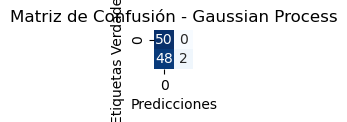

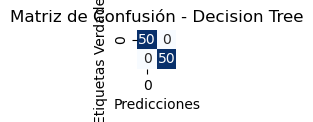

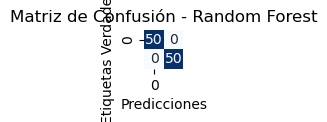

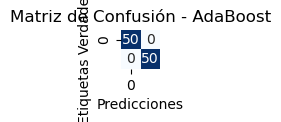

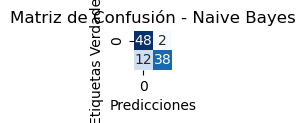

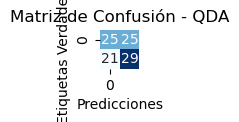

In [33]:


# 1. Cargar modelos entrenados
modelos_guardados = {}  # Un diccionario para almacenar los modelos entrenados

for nombre, _ in modelos:
    # Cargar el modelo
    ruta_modelo = f"{nombre}_modelo_entrenado.pkl"
    modelo_cargado = joblib.load(ruta_modelo)
    modelos_guardados[nombre] = modelo_cargado

# 2. Crear o cargar un conjunto de datos de menor dimensionalidad (df_menor_dimensionalidad)
df_menor_dimensionalidad = df_Val


# 3. Hacer predicciones con modelos guardados en el conjunto de datos 
resultados_prediccion = pd.DataFrame(columns=['Modelo', 'Predicciones', 'Etiquetas Verdaderas'])

for nombre, modelo_cargado in modelos_guardados.items():
    # Realizar predicciones en el conjunto de datos 
    y_pred_menor_dimensionalidad = modelo_cargado.predict(df_menor_dimensionalidad)

    # Almacenar los resultados en un DataFrame
    resultados_prediccion = resultados_prediccion.append({
        'Modelo': nombre,
        'Predicciones': y_pred_menor_dimensionalidad.tolist(),
        'Etiquetas Verdaderas': df_Val['label'].tolist()
    }, ignore_index=True)

    # Calcular la matriz de confusión
    matriz_confusion = confusion_matrix(df_Val['label'], y_pred_menor_dimensionalidad)

    # Mostrar la matriz de confusión como una imagen
    plt.figure(figsize=(0.5, 0.5))
    sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicciones")
    plt.ylabel("Etiquetas Verdaderas")
    plt.show()

# Imprimir los resultados de la predicción
#print("Resultados de la predicción en menor dimensionalidad:")
#print(resultados_prediccion)

Se observa que los modelos basados en arboles generan resultados muy buenos. Esto no es necesariammente bueno, el modelo mas real termine siendo Naive Bayes, a QDA no le va muy bien con la validaciòn ni tampoco a Gaussian Process.

# Deep learning basico (prueba adicional)

Para una prueba sencilla se utilizara una RNN y una CNN, esto con un proposito comparativo. 

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Reemplaza esto con tu DataFrame
# Asegúrate de tener las características en las columnas adecuadas y la etiqueta en una columna llamada 'label'
df = pd.DataFrame(np.random.rand(100, 10), columns=[f'feature_{i}' for i in range(10)])
df['label'] = (df['feature_0'] > 0.5).astype(int)

# Número de repeticiones
num_repetitions = 10

# Lista para almacenar los resultados de la precisión
accuracy_results = []

for _ in range(num_repetitions):
    # Separar el dataset
    X = df_DR.drop('label', axis=1)
    y = df_DR['label']

    # Dividir datos en conjuntos de entrenamiento y validación
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalizar los datos
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    # Reformatear los datos para que coincidan con las expectativas de la capa de entrada de la RNN
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

    # Construir el modelo de RNN
    model = Sequential()
    model.add(SimpleRNN(32, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1, activation='sigmoid'))

    # Compilar el modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Configurar EarlyStopping para detener el entrenamiento si la precisión en el conjunto de validación no mejora
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

    # Entrenar el modelo con la condición de parada
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

    # Evaluar el modelo en el conjunto de prueba
    _, test_accuracy = model.evaluate(X_val, y_val)
    
    # Almacenar el resultado de la precisión
    accuracy_results.append(test_accuracy)

# Calcular y mostrar el promedio de la precisión
average_accuracy = np.mean(accuracy_results)
print(f'\nAverage Accuracy over {num_repetitions} repetitions: {average_accuracy * 100:.2f}%')

Epoch 1/50
21/21 [==============================] - 6s 267ms/step - loss: 0.7050 - accuracy: 0.5000 - val_loss: 0.7019 - val_accuracy: 0.4695
Epoch 2/50
21/21 [==============================] - 5s 258ms/step - loss: 0.6882 - accuracy: 0.5752 - val_loss: 0.6945 - val_accuracy: 0.5061
Epoch 3/50
21/21 [==============================] - 5s 263ms/step - loss: 0.6827 - accuracy: 0.5675 - val_loss: 0.6912 - val_accuracy: 0.5061
Epoch 4/50
21/21 [==============================] - 5s 262ms/step - loss: 0.6769 - accuracy: 0.5997 - val_loss: 0.6807 - val_accuracy: 0.5488
Epoch 5/50
21/21 [==============================] - 6s 263ms/step - loss: 0.6705 - accuracy: 0.6028 - val_loss: 0.6727 - val_accuracy: 0.5732
Epoch 6/50
21/21 [==============================] - 5s 262ms/step - loss: 0.6661 - accuracy: 0.6411 - val_loss: 0.6664 - val_accuracy: 0.6159
Epoch 7/50
21/21 [==============================] - 5s 261ms/step - loss: 0.6589 - accuracy: 0.6212 - val_loss: 0.6639 - val_accuracy: 0.5915
Epoch 

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Asegúrate de tener las características en las columnas adecuadas y la etiqueta en una columna llamada 'label'
df = pd.DataFrame(np.random.rand(100, 10), columns=[f'feature_{i}' for i in range(10)])
df['label'] = (df['feature_0'] > 0.5).astype(int)

# Número de repeticiones
num_repetitions = 10

# Lista para almacenar los resultados de la precisión
accuracy_results = []

for _ in range(num_repetitions):
    # Separar el dataset
    X = df_DR.drop('label', axis=1)
    y = df_DR['label']

    # Dividir datos en conjuntos de entrenamiento y validación
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalizar los datos
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    # Reformatear los datos para que coincidan con las expectativas de la capa de entrada de la CNN
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

    # Construir el modelo de CNN
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    # Compilar el modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Configurar EarlyStopping para detener el entrenamiento si la precisión en el conjunto de validación no mejora
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

    # Entrenar el modelo con la condición de parada
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

    # Evaluar el modelo en el conjunto de prueba
    _, test_accuracy = model.evaluate(X_val, y_val)
    
    # Almacenar el resultado de la precisión
    accuracy_results.append(test_accuracy)

# Calcular y mostrar el promedio de la precisión
average_accuracy = np.mean(accuracy_results)
print(f'\nAverage Accuracy over {num_repetitions} repetitions: {average_accuracy * 100:.2f}%')

Epoch 1/50
21/21 [==============================] - 1s 30ms/step - loss: 0.6586 - accuracy: 0.7362 - val_loss: 0.6504 - val_accuracy: 0.7378
Epoch 2/50
21/21 [==============================] - 1s 26ms/step - loss: 0.0660 - accuracy: 0.9939 - val_loss: 0.3257 - val_accuracy: 0.9085
Epoch 3/50
21/21 [==============================] - 1s 25ms/step - loss: 0.0168 - accuracy: 1.0000 - val_loss: 0.3202 - val_accuracy: 0.9146
Epoch 4/50
21/21 [==============================] - 1s 27ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.2721 - val_accuracy: 0.9329
Epoch 5/50
21/21 [==============================] - 1s 27ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.2569 - val_accuracy: 0.9390
Epoch 6/50
21/21 [==============================] - 1s 27ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.2631 - val_accuracy: 0.9329
Epoch 7/50
21/21 [==============================] - 1s 27ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.2540 - val_accuracy: 0.9390
Epoch 8/50
6/

Podemos ver que la CNN obtuvo una buena metrica de accuracy, ese 91.89% es el promediado de 10 corridas consecutivas por lo que podemos tomarlo como un valor confiable. 

# Conclusiones

Observando los resultados generados por los modelos tradicionales podemos intuir que los que estan basados en arboles son muy buenos, sin embargo se debe tomar en cuenta el preprocesameinto de los datos. Este procedimiento genera varias representaciones vectoriales de diferente naturaleza y las normaliza mediante Zscore. Ademas de eso, el proceso de unir varias vectorizaciones se realizo para tratar de "predecir" la propiedad que tienen los CPP (cell penetrating peptide) siendo esta una forma de aumento de caracteristicas. 
Puede ser que al duplicar las caracteristicas causaramos que los modelos basados en arboles fueran capaces de encontrar una tendencia y clasiifcarlos de manera perfecta. La forma de probar esto seria realizar predicciones sobre otros datos distintos para observar que tal lo hace el modelo. 
Se probaron algunos metodos de clustering sin embargo no arrojaron resultados buenos. 

Se probaron utilizar componentes generadas mediante PCA, UMAP y t-SNE sin exito, aunque estas prevenian las metricas perfectas no generaban salidas satisfactorias, de hecho, empeoraba la mayoria de los modelos. 

Sorprendentemente el enfoque de DL, especificamente la RNN mostro una metrica de accuracy muy buena. Dado que esa fue una prueba preliminar sin ninguna clase de modificación especifica sobre el modelo hay una linea de trabajo clara sobre esta area y habria que probar una cantidad de datos mas grande para comprobar resultados.  

A continuación se muestra una tabla que reune las metricas obtenidas con todos los modelos. 

|        Modelo       | Exactitud | Sensibilidad | Especificidad | F1 Score   |
|:-------------------:|:---------:|:------------:|:-------------:|:----------:|
| Gaussian Process    | 52.94     | 5.16         | 100.00        | 9.61       |
| Decision Tree       | 99.51     | 99.51        | 99.51         | 99.50      |
| Random Forest       | 100.00    | 100.00       | 100.00        | 100.00     |
| AdaBoost            | 99.63     | 100.00       | 98.54         | 99.27      |
| Naive Bayes         | 85.05     | 72.85        | 97.07         | 82.61      |
| QDA                 | 52.46     | 58.55        | 46.44         | 54.88      |
| CNN                 | 91.89     |              |               |            |
| RNN                 | 67.13     |              |               |            |


Finalmente, para el preprocesamiento de los datos se utilizaron algunos codigos auxiliares, abajo se adjuntan los codigos en lenguaje R que facilitaron la creacion del dataset utilizado dado que los archivos originales estan en un formato especial llamado fasta.